<a href="https://colab.research.google.com/github/Naaaaaana/DWBI_Groupcw2/blob/main/DWBIGCW_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install geopy
import pandas as pd
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [73]:
df = pd.read_csv('/content/bank_transactions.csv')

In [74]:
df.shape

(1048567, 9)

In [75]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [76]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.00
CustomerID,0.00
CustomerDOB,0.32
CustGender,0.10
CustLocation,0.01
CustAccountBalance,0.23
TransactionDate,0.00
TransactionTime,0.00
TransactionAmount (INR),0.00


In [77]:
df_Fact1 = df

In [78]:
df_Fact1 = df_Fact1.dropna()

In [79]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [80]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(1041614, 9)

In [81]:
# Count unique DOBs per customer
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = dob_check[dob_check > 1]

print("Customers with multiple DOBs remaining (should be 0):")
print(conflicts)

Customers with multiple DOBs remaining (should be 0):
CustomerID
C1010011    2
C1010014    2
C1010031    2
C1010035    2
C1010041    3
           ..
C9090141    2
C9093042    2
C9094224    2
C9095886    2
C9096252    2
Name: CustomerDOB, Length: 140647, dtype: int64


In [83]:
# Replace DateOfBirth with mode for each CustomerID
df_Fact1['CustomerDOB'] = df_Fact1.groupby('CustomerID')['CustomerDOB'].transform(lambda x: x.mode().iloc[0])

<ipython-input-83-3def4da8cb93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = df_Fact1.groupby('CustomerID')['CustomerDOB'].transform(lambda x: x.mode().iloc[0])


In [84]:
# Count unique DOBs per customer
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = dob_check[dob_check > 1]

print("Customers with multiple DOBs remaining (should be 0):")
print(conflicts)

Customers with multiple DOBs remaining (should be 0):
Series([], Name: CustomerDOB, dtype: int64)


In [85]:
from datetime import datetime

In [86]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-86-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-86-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-86-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [87]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940,676.00,-47
6,T7,C7126560,1986-09-14,F,MUMBAI,973.46,2/8/16,173806,566.00,39
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41


In [88]:
#filter Transectiondate error
future_transactions = df_Fact1[df_Fact1['TransactionDate'] >= '2025-04-01']
pre_birth_transactions = df_Fact1[df_Fact1['TransactionDate'] <= df_Fact1['CustomerDOB']]
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 567577
the transactiondate before birth： 104113


In [89]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

<ipython-input-89-effcaf656fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
<ipython-input-89-effcaf656fc4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-89-effcaf656fc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Customers under 10 years old: 104287
Customers with age > 0: 937493


In [17]:
df_Fact1.shape

(1041614, 11)

In [92]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

Customers with negative age: 104113
Customers under 10 years old: 104287
Customers with age > 0: 937493


<ipython-input-92-897530f0bad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
<ipython-input-92-897530f0bad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-92-897530f0bad1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [93]:
from datetime import timedelta

# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")

# Recalculate age
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Adjust DOBs with negative age by subtracting 100 years
mask = df_Fact1["AgeAtTransaction"] < 0
df_Fact1.loc[mask, "CustomerDOB"] = df_Fact1.loc[mask, "CustomerDOB"] - pd.DateOffset(years=100)

# Recalculate age after correction (optional)
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

<ipython-input-93-f7d414d8c6eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
<ipython-input-93-f7d414d8c6eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")
<ipython-input-93-f7d414d8c6eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [94]:
initial_count = len(df_Fact1)
df_Fact1 = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10]
removed = initial_count - len(df_Fact1)

print(f"Removed {removed} rows with age under 10.")

Removed 174 rows with age under 10.


In [95]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age >= 10: {valid_age_count}")

Customers with negative age: 0
Customers under 10 years old: 0
Customers with age >= 10: 1041440


In [96]:
from datetime import datetime

# Drop the old column
df_Fact1.drop(columns=["AgeAtTransaction"], inplace=True)

# Calculate age as of today
today = pd.to_datetime(datetime.today().date())
df_Fact1["Age"] = ((today - df_Fact1["CustomerDOB"]).dt.days // 365)

In [97]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [100]:
from datetime import datetime #https://stackoverflow.com/questions/19557434/python-convert-verify-5-or-6-digit-int-as-a-valid-time

def convert_hhmmss_integer_to_time(val):
    if pd.isna(val) or val == 0:
        return None
    try:
        val_str = str(int(val)).zfill(6)  # Ensure 6-digit string
        return datetime.strptime(val_str, "%H%M%S").time()
    except:
        return None

df_Fact1.loc[:, "TransactionTime"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)

<ipython-input-100-714548920ee7>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.time(14, 32, 7) datetime.time(14, 18, 58)
 datetime.time(14, 27, 12) ... datetime.time(18, 33, 13)
 datetime.time(18, 47, 6) datetime.time(18, 12, 22)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_Fact1.loc[:, "TransactionTime"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)


In [101]:
df_Fact1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00,28,14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00,51,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50,37,18:11:56


In [102]:
df_Fact1["TransactionTime"].isna().sum()         # NaN count

np.int64(2)

In [103]:
df_Fact1.dropna(subset=["TransactionTime"], inplace=True)

In [104]:
df_Fact1["TransactionTime"].isna().sum()         # NaN count

np.int64(0)

In [105]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,1041438.00
mean,52.69
std,48.64
min,18.00
25%,34.00
50%,38.00
75%,45.00
max,225.00


In [107]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] > 120)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 0].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 74703
transaction_error_amount: 820


In [108]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['TransactionAmount (INR)'] > 0)]

#Remove CustLocation errors
df_Fact1_clean = df_Fact1_clean[~df_Fact1_clean['CustLocation'].isin([".", "400012"])]

In [110]:
# Step 1: Calculate median DOB using only customers with age ≤ 105
valid_dobs = df_Fact1_clean[df_Fact1_clean["Age"] <= 120]["CustomerDOB"]
median_dob = valid_dobs.median()

# Step 2: Calculate median age (based on today's date)
from datetime import datetime
today = pd.to_datetime(datetime.today().date())
median_age = ((today - median_dob).days // 365)

# Step 3: Replace DOB and Age where age > 105
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 120, "CustomerDOB"] = median_dob
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 120, "Age"] = median_age

In [111]:
df_Fact1_clean.shape

(1040530, 11)

In [112]:
df_Fact1_clean['Age'].describe()

,Age
count,1040530.00
mean,39.21
std,8.50
min,18.00
25%,34.00
50%,37.00
75%,42.00
max,107.00


In [113]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,1040530.00
mean,1566.97
std,6563.83
min,0.01
25%,161.37
50%,458.39
75%,1200.00
max,1560034.99


In [114]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.00,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.00,28,14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00,51,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.50,37,18:11:56
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.00,52,17:39:40
6,T7,C7126560,1986-09-14,F,MUMBAI,973.46,2016-02-08,17:38:06,566.00,38,17:38:06
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.00,43,17:05:37
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833.00,37,19:28:25
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289.11,40,19:24:46


In [115]:
df_Fact1_clean.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [116]:
df_Fact1_clean.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,object
TransactionAmount (INR),float64
Age,int64


In [117]:
df_Fact1_clean.shape

(1040530, 11)

In [41]:
df_Fact1_clean['CustLocation'].describe()

,CustLocation
count,1040554
unique,9267
top,MUMBAI
freq,101907


In [122]:
!pip install fuzzywuzzy python-Levenshtein
!pip install geotext
from geotext import GeoText
from fuzzywuzzy import process

# List of Indian cities
indian_cities = [
    'MUMBAI', 'DELHI', 'BANGALORE', 'HYDERABAD', 'AHMEDABAD', 'CHENNAI', 'KOLKATA',
    'SURAT', 'PUNE', 'JAIPUR', 'LUCKNOW', 'KANPUR', 'NAGPUR', 'INDORE', 'BHOPAL',
    'PATNA', 'LUDHIANA', 'AGRA', 'VADODARA', 'NASHIK', 'FARIDABAD', 'MEERUT',
    'RAJKOT', 'KALYAN', 'VASAI', 'VARANASI', 'SRINAGAR', 'AURANGABAD', 'DHANBAD',
    'AMRITSAR', 'NAVI MUMBAI', 'ALLAHABAD', 'RANCHI', 'HOWRAH', 'JABALPUR',
    'GWALIOR', 'VIJAYAWADA', 'JODHPUR', 'MADURAI', 'RAIPUR', 'KOTA', 'GUWAHATI',
    'CHANDIGARH', 'THIRUVANANTHAPURAM', 'SOLAPUR', 'HUBLI', 'TIRUCHIRAPPALLI'
]

# Case-insensitive mapping for fuzzy match
city_map = {city.lower(): city for city in indian_cities}
city_list_lower = list(city_map.keys())

# Clean function
def clean_location(location):
    location_str = str(location).strip()

    # GeoText
    places = GeoText(location_str)
    if places.cities:
        return places.cities[0].upper()  # Return in ALL CAPS

    # Fuzzy match
    match, score = process.extractOne(location_str.lower(), city_list_lower)
    if score > 80:
        return city_map[match].upper()  # Convert to ALL CAPS

    # Otherwise, keep original (also likely in all caps)
    return location

# Apply cleaning
df_Fact1_clean['CustLocation'] = df_Fact1_clean['CustLocation'].apply(clean_location)

In [123]:
top_30 = df_Fact1_clean['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
DELHI          156988
MUMBAI         119647
BANGALORE       91199
GURGAON         73517
NOIDA           32623
CHENNAI         31065
PUNE            29960
HYDERABAD       25049
THANE           21388
KOLKATA         20436
GHAZIABAD       15703
NAVI MUMBAI     13481
AHMEDABAD       12689
FARIDABAD       11685
JAIPUR          10350
CHANDIGARH       9506
LUCKNOW          7766
PATNA            7510
MOHALI           6649
SURAT            6227
NASHIK           5604
LUDHIANA         4942
KANPUR           4833
DEHRADUN         4281
NAGPUR           4015
VADODARA         3956
AMRITSAR         3878
INDORE           3874
AGRA             3676
COIMBATORE       3534
Name: count, dtype: int64


In [124]:
top_100 = df_Fact1_clean['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
DELHI        156988
MUMBAI       119647
BANGALORE     91199
GURGAON       73517
NOIDA         32623
              ...  
JABALPUR        984
MADURAI         984
GWALIOR         972
HOOGHLY         966
THRISSUR        960
Name: count, Length: 100, dtype: int64


In [127]:
location_counts = df_Fact1_clean['CustLocation'].value_counts()
print(location_counts)

CustLocation
DELHI                     156988
MUMBAI                    119647
BANGALORE                  91199
GURGAON                    73517
NOIDA                      32623
                           ...  
MAHINDER GARH                  1
KHED RAJGURUNAGAR              1
MAHALPAT KANGRA                1
SUPAUL DARBHANGA               1
DOMBIVLI EAST DOMBIVLI         1
Name: count, Length: 5548, dtype: int64


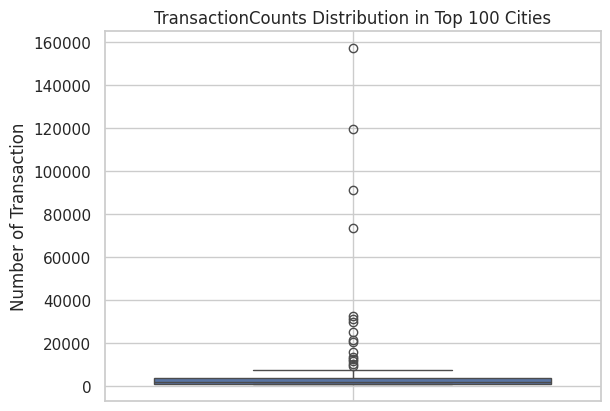

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

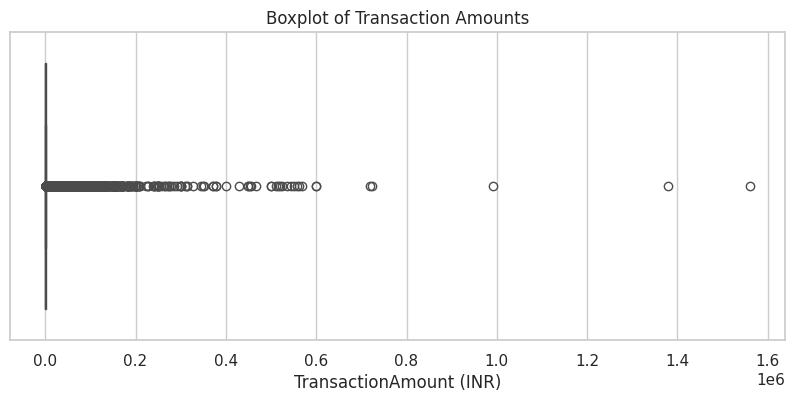

In [46]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

In [47]:
# Step 1: Calculate IQR
Q1 = df_Fact1_clean["TransactionAmount (INR)"].quantile(0.25)
Q3 = df_Fact1_clean["TransactionAmount (INR)"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Get outliers
below_lower = df_Fact1_clean[df_Fact1_clean["TransactionAmount (INR)"] < lower_bound]
above_upper = df_Fact1_clean[df_Fact1_clean["TransactionAmount (INR)"] > upper_bound]

# Step 4: Print counts
print(f"Count of values below lower bound ({lower_bound:.2f}): {below_lower.shape[0]}")
print(f"Count of values above upper bound ({upper_bound:.2f}): {above_upper.shape[0]}")

Count of values below lower bound (-1396.58): 0
Count of values above upper bound (2757.95): 110744


In [48]:
def remove_upper_outliers(data, column, upper_percent=0.02):
    upper_limit = data[column].quantile(1 - upper_percent)
    filtered = data[data[column] <= upper_limit]

    print(f"Removed top {upper_percent*100:.2f}% of values above {upper_limit:.2f}")
    print(f"Remaining rows: {filtered.shape[0]} / {data.shape[0]} "
          f"({100 * filtered.shape[0] / data.shape[0]:.2f}%)")

    return filtered

In [49]:
df_Fact1_clean = remove_upper_outliers(df_Fact1_clean, "TransactionAmount (INR)")

Removed top 2.00% of values above 11155.00
Remaining rows: 1019743 / 1040554 (98.00%)


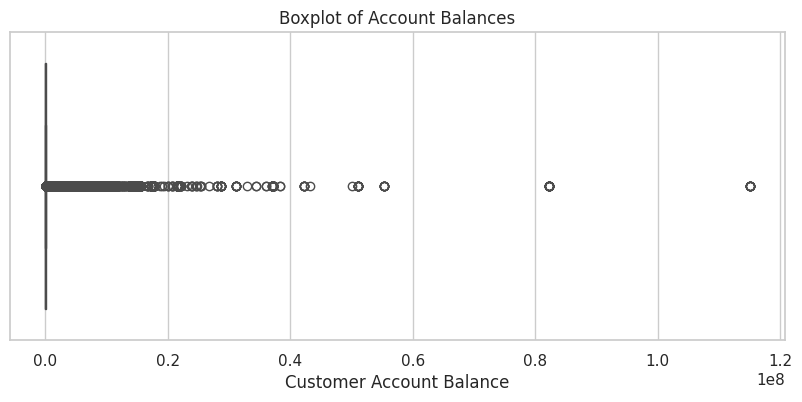

In [50]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

In [51]:
# Step 1: Calculate IQR
Q1 = df_Fact1_clean["CustAccountBalance"].quantile(0.25)
Q3 = df_Fact1_clean["CustAccountBalance"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Get outliers
below_lower = df_Fact1_clean[df_Fact1_clean["CustAccountBalance"] < lower_bound]
above_upper = df_Fact1_clean[df_Fact1_clean["CustAccountBalance"] > upper_bound]

# Step 4: Print counts
print(f"Count of values below lower bound ({lower_bound:.2f}): {below_lower.shape[0]}")
print(f"Count of values above upper bound ({upper_bound:.2f}): {above_upper.shape[0]}")

Count of values below lower bound (-71764.20): 0
Count of values above upper bound (131975.16): 136061


In [52]:
df_Fact1_clean = remove_upper_outliers(df_Fact1_clean, "CustAccountBalance")

Removed top 2.00% of values above 882898.00
Remaining rows: 999372 / 1019743 (98.00%)


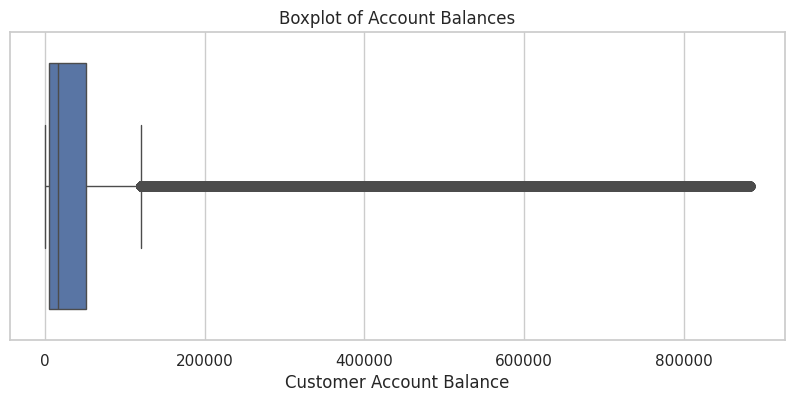

In [53]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

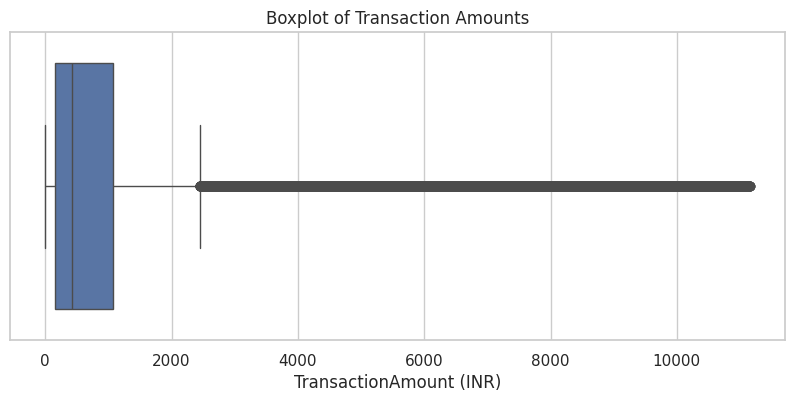

In [54]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

In [55]:
total_transactions = top_100_df['TransactionCounts'].sum()
print(total_transactions)

816861


In [56]:
df_Fact1_clean2 = df_Fact1_clean.copy()

In [57]:
# Unify the same city name
df_Fact1_clean2['CustLocation'] = df_Fact1_clean2['CustLocation'].replace(
    {'BENGALURU': 'BANGALORE', 'BENGALOORU': 'BANGALORE', 'BENGALORE': 'BANGALORE'})

In [58]:
top_100 = df_Fact1_clean2['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI               96788
BANGALORE            80641
NEW DELHI            78845
GURGAON              70179
DELHI                67869
                     ...  
ROHTAK                 971
HOOGHLY                945
YAMUNANAGAR            934
THRISSUR               921
SOUTH 24 PARGANAS      917
Name: count, Length: 100, dtype: int64


In [59]:
#Display the 5 top Locations
import sqlite3
conn = sqlite3.connect('transactions.db')
df_Fact1_clean2.to_sql('transactions', conn, if_exists='replace', index=False)

999372

In [60]:
query = """
SELECT CustLocation, COUNT(*) AS transaction_count
FROM transactions
GROUP BY CustLocation
ORDER BY transaction_count DESC
LIMIT 5
"""

top_locations = pd.read_sql_query(query, conn)
print(top_locations)

  CustLocation  transaction_count
0       MUMBAI              96788
1    BANGALORE              80641
2    NEW DELHI              78845
3      GURGAON              70179
4        DELHI              67869


In [61]:
#RFM analysis
#set analysis date
analysis_date = df_Fact1_clean2['TransactionDate'].max() + pd.Timedelta(days=1)
print("Analysis date:", analysis_date)

Analysis date: 2016-12-10 00:00:00


In [62]:
#Calculate Recency，Frequency，Monetary
rfm = df_Fact1_clean2.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (analysis_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
}).reset_index()

In [63]:
#Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [64]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,75,2,5106.00
1,C1010012,118,1,1499.00
2,C1010014,155,2,1455.00
3,C1010018,86,1,30.00
4,C1010024,114,1,5000.00
5,C1010028,103,1,557.00
6,C1010031,246,2,1864.00
7,C1010035,105,2,750.00
8,C1010036,106,1,208.00
9,C1010038,154,1,100.00


In [65]:
rfm.describe()

,Recency,Frequency,Monetary
count,849155.00,849155.00,849155.00
mean,130.11,1.18,1142.71
std,80.22,0.44,1685.72
min,1.00,1.00,0.01
25%,87.00,1.00,199.00
50%,110.00,1.00,500.00
75%,155.00,1.00,1350.03
max,337.00,6.00,23054.75


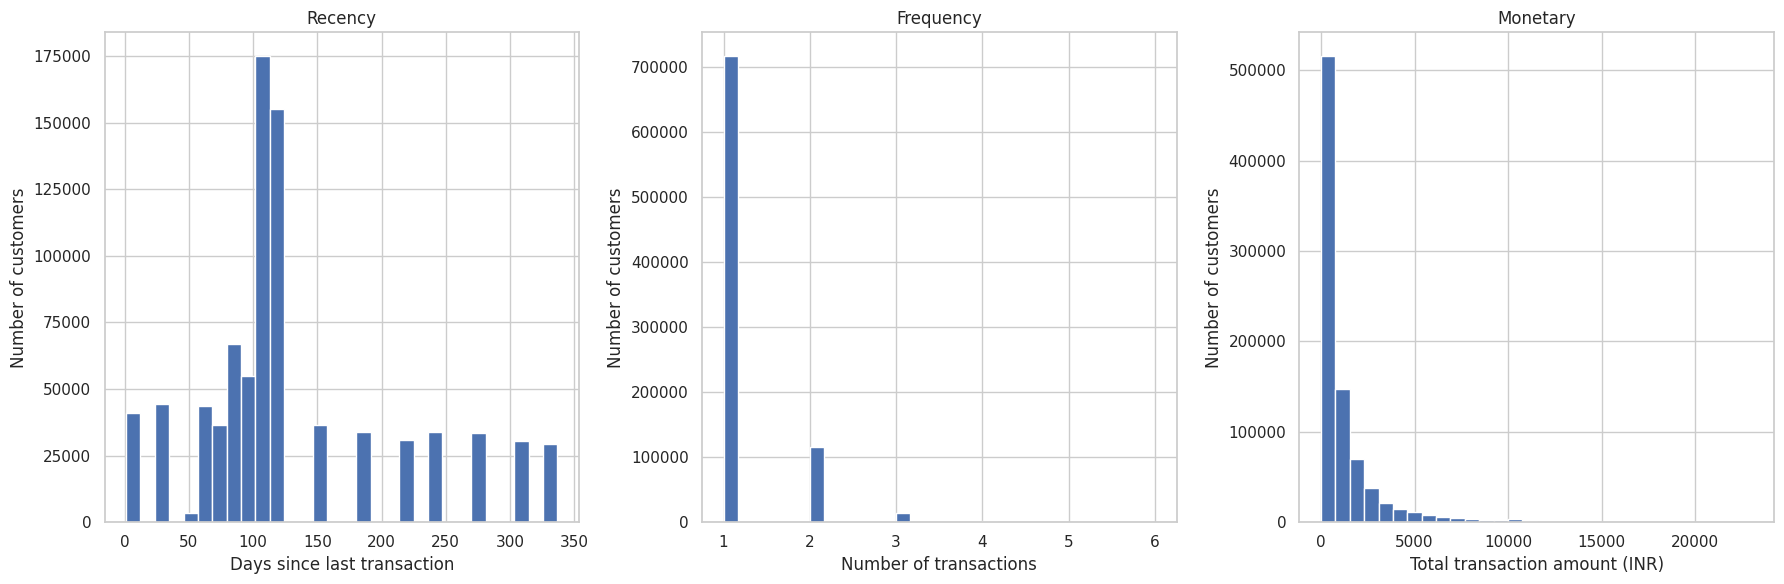

In [66]:
#Check Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Recency
axs[0].hist(rfm['Recency'], bins=30)
axs[0].set_title('Recency')
axs[0].set_xlabel('Days since last transaction')
axs[0].set_ylabel('Number of customers')

# Frequency
axs[1].hist(rfm['Frequency'], bins=30)
axs[1].set_title('Frequency')
axs[1].set_xlabel('Number of transactions')
axs[1].set_ylabel('Number of customers')

# Monetary
axs[2].hist(rfm['Monetary'], bins=30)
axs[2].set_title('Monetary')
axs[2].set_xlabel('Total transaction amount (INR)')
axs[2].set_ylabel('Number of customers')

plt.tight_layout()
plt.show()

In [67]:
from scipy import stats

rfm_boxcox = pd.DataFrame({
    'CustomerID': rfm['CustomerID'],
    'Recency': stats.boxcox(rfm['Recency'] + 1)[0],
    'Frequency': stats.boxcox(rfm['Frequency'])[0],
    'Monetary': stats.boxcox(rfm['Monetary'] + 1)[0]
})

In [68]:
rfm_boxcox.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,18.25,0.12,13.94
1,C1010012,23.94,0.00,11.08
2,C1010014,28.13,0.12,11.01
3,C1010018,19.82,0.00,4.15
4,C1010024,23.45,0.00,13.88
5,C1010028,22.08,0.00,9.03
6,C1010031,36.86,0.12,11.56
7,C1010035,22.33,0.12,9.62
8,C1010036,22.46,0.00,7.20
9,C1010038,28.02,0.00,5.96


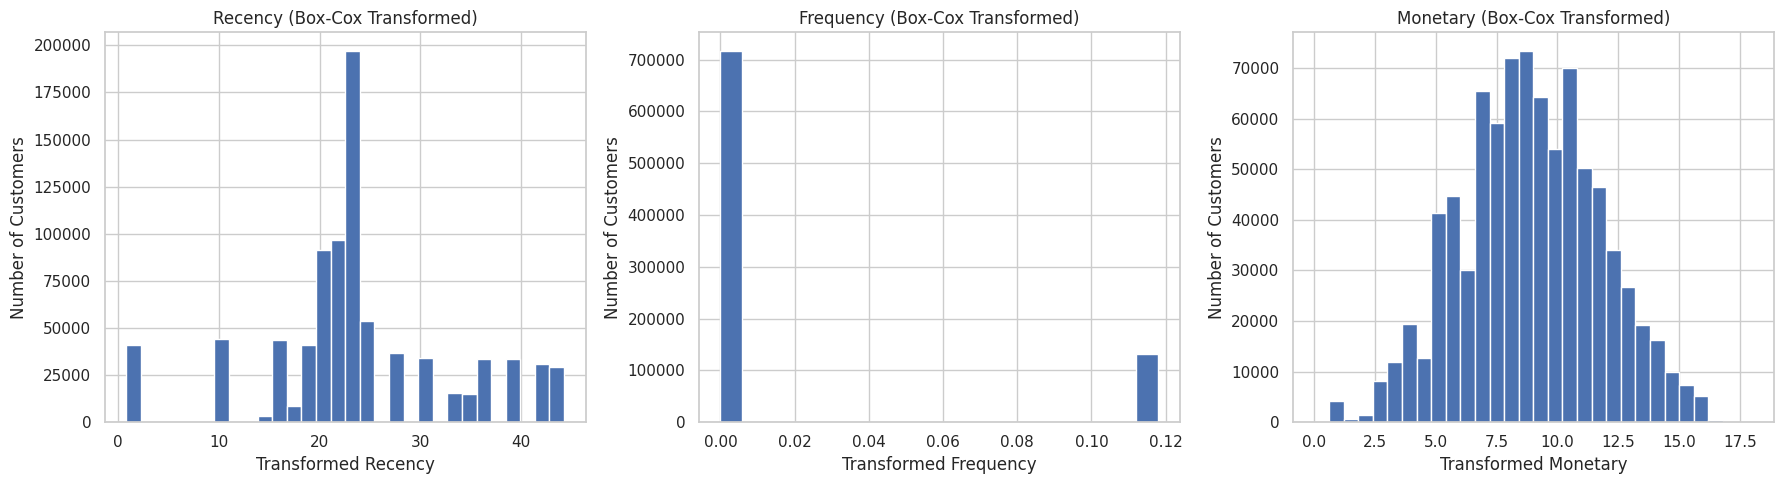

In [69]:
#Check Distribution after remove skew

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axs[0].hist(rfm_boxcox['Recency'], bins=30)
axs[0].set_title('Recency (Box-Cox Transformed)')
axs[0].set_xlabel('Transformed Recency')
axs[0].set_ylabel('Number of Customers')

# Frequency
axs[1].hist(rfm_boxcox['Frequency'], bins=20)
axs[1].set_title('Frequency (Box-Cox Transformed)')
axs[1].set_xlabel('Transformed Frequency')
axs[1].set_ylabel('Number of Customers')

# Monetary
axs[2].hist(rfm_boxcox['Monetary'], bins=30)
axs[2].set_title('Monetary (Box-Cox Transformed)')
axs[2].set_xlabel('Transformed Monetary')
axs[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()
